<a href="https://colab.research.google.com/github/zerobridge/MLPerfectGuide/blob/main/%E2%93%92_%ED%8C%8C%EC%9D%B4%EC%8D%AC_ML_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_%5B6~8%5D_PCA_%EA%B5%B0%EC%A7%91%ED%99%94_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D_v0_11_230211(p_441_%ED%8F%89%EA%B0%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[07] 군집화**

**▶ 군집화(Clustering)**

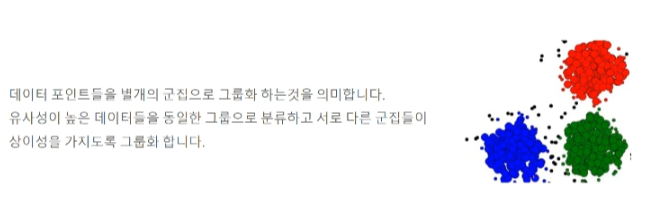

**▶ 군집화 활용 분야**

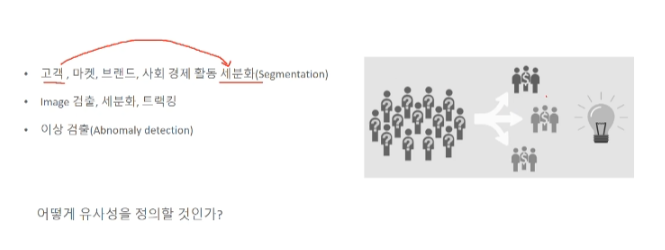

- 세그멘테이션 : 고객등을 특정 유형별로 나눈다.
- 이상검출 : 아웃라이어 발견

**▶ 군집화 알고리즘**

- K-Means : Centroid 기반, 비즈니스 영역에서 가장 많이 활용
- Mean Shift : Centroid 기반 (움직이는 방식이 Mean Shift와 다소 다름)
- Gaussian Mixture Model : 데이터가 여러개의 정규분포로 이루어져있다고 가정 하고, 이 데이터 세트가 어느 정규분포에 속하는지에 따라 클러스터링 수행 
- DBSCAN : 데이터의 밀도에 따라 군집화 수행

### **01. K-평균 알고리즘 이해**

**▶ K-Means Clustering**

- 군집화에서 가장 일반적으로 사용되는 알고리즘
- Centroid라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

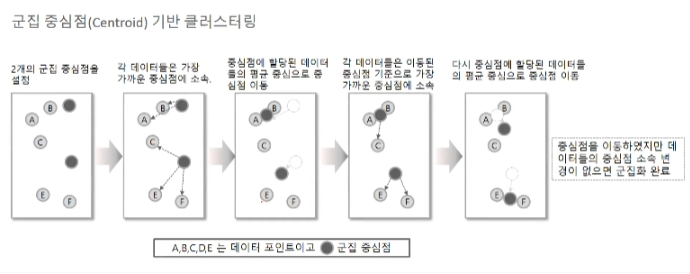

1) 중심을 군집화 개수만큼 임의의 위치에 가져다 놓는다. (단, 임의의 위치에 가져다 놓으면 시간이 오래걸리므로 초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓음)

2) 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨 (위 그림에서는 A,B가 같은 중심점)

3) 2)에서 소속이 결정된 후 군집 중심점을 소속된 데이터의 평균 중심으로 이동함

4) 중심점이 이동했기에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경

5) 다시 중심을 소속된 데이터의 평균 줌심으로 이동

6) 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료함

**▶ K-means의 장점과 단점**

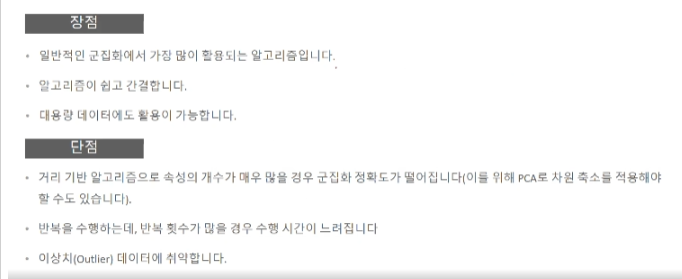

#### **(1) 사이킷런 KMeans 클래스 소개**

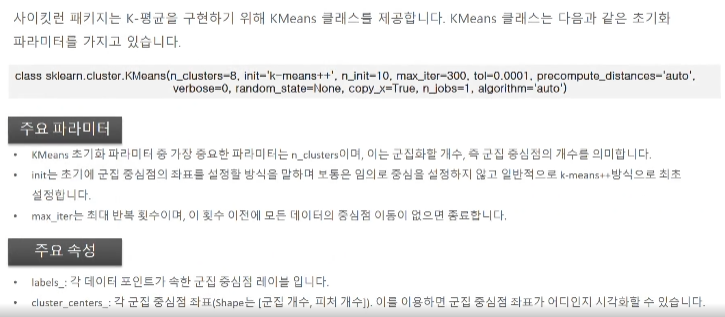

- KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행하면 된다.
- 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수가 있음 (labels_, cluster_centers_)

#### **(2) K-평균을 이용한 붓꽃 데이터 세트 군집화**

- 붓꽃 데이터를 활용한 K-평균 군집화 수행
- 붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류
- 꽃받침, 꽃잎의 길이에 따른 각 데이터 군집화 현황 파악 및 이를 분류값과 비교

#### **예제 7.1-A) K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering**

**$ 필요한 모듈과 데이터 세트를 로드/데이터프레임 변환**

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print('target name:', iris.target_names)
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(10)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**$ KMeans 객체를 생성하고 군집화 수행**
* labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인
* fit_predict(), fit_transform() 수행 결과 확인. 

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

- 붓꽃 데이터세트를 3개의 그룹으로 군집화 (n_cluster)
- 초기 중심 설정방식 : 디폴트 값인 k-means++
- 최대 반복 횟수 : 디폴트 값인 max_iter = 300

- 군집화 수행 결과가 kmeans 객체 변수로 반환됨

In [3]:
print(kmeans.labels_) # 타겟값(실제값)과 전혀 다른 개념이고 값이 다를 수 있음

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- kmeans의 labels_ 속성값 확인을 통해 irisDF의 각 데이터가 어떤 중심에 속하는지를 알 수 있음
- labels_ 의 값이 0,1,2로 되어 있는걸 확인 가능하며, 이는 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미

(참고) kmeans 객체의 라벨값은 한 개의 컬럼, irisDF의 피처가 4개라는 것을 알 수 있음 

In [4]:
print(kmeans.labels_.shape, irisDF.shape)

(150,) (150, 4)


**$(참고) fit_predict(X)**
- 위와 같이 레이블 값 반환하는 것과 값에대한 차이는 없고, array라는 게 다름
- 즉, 각 개별 데이터가 어떤 센트로이드에 소속되는지 반환

In [5]:
kmeans.fit_predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**$(참고) fit_transform(X)**
- 지도학습에서 처럼 변형이라기 보다는 각 데이터의 좌표값을 반환
- 클러스터링을 진행한 후에 cluster-distance space로 변환한다.
- 각 레코드별 데이터와 클러스터까지의 distance 값
- 즉, fit(X).transform(X)와 같음

In [16]:
kmeans.fit_transform(irisDF)
# kmeans.fit_transform(irisDF).shape 결과 : (150,3)   ※ 참고로 피처 개수는 4개였음

array([[0.19553803, 5.08770781, 7.48222711],
       [0.58383642, 5.05596476, 7.55265001],
       [0.58954565, 5.28948441, 7.78038114],
       [0.73881149, 5.0910485 , 7.60935078],
       [0.24796852, 5.15038137, 7.54274424],
       [0.94450662, 4.71824225, 6.97203837],
       [0.53169697, 5.20987208, 7.68531767],
       [0.07349138, 4.97655964, 7.40496983],
       [1.14156198, 5.29354218, 7.8462831 ],
       [0.48509568, 5.00337621, 7.48948847],
       [0.67632437, 4.9604407 , 7.2634284 ],
       [0.31030687, 4.93858772, 7.39548323],
       [0.67297949, 5.14881369, 7.65629608],
       [1.29042203, 5.74474307, 8.28702939],
       [1.41573004, 5.39052273, 7.54422346],
       [1.68324823, 5.17879262, 7.24428381],
       [0.90137779, 5.18378541, 7.44191011],
       [0.18827348, 5.03974226, 7.43353989],
       [1.15781333, 4.67652152, 6.88573729],
       [0.50858809, 5.02470043, 7.36226999],
       [0.60439584, 4.622919  , 6.98596768],
       [0.4199303 , 4.94129487, 7.29740757],
       [0.

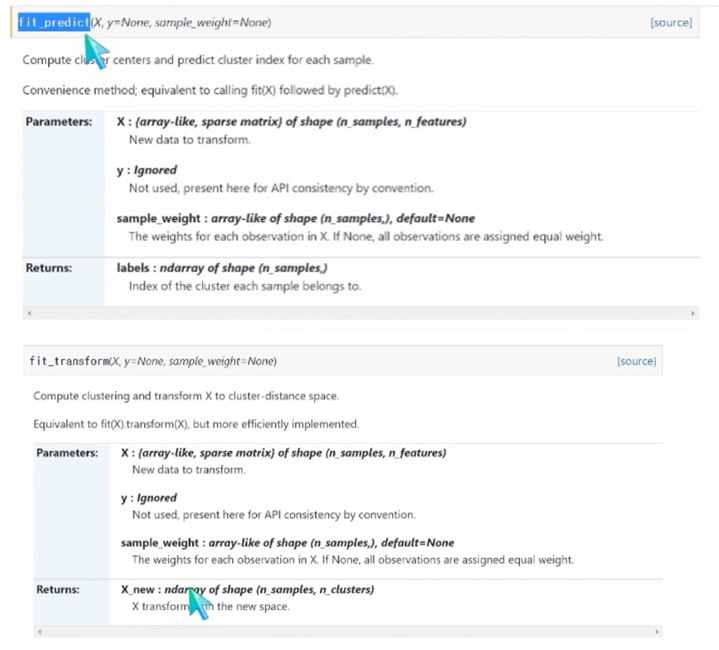

**$ 군집화 결과를 irisDF에 'cluster' 컬럼으로 추가하고 target 값과 결과 비교**

In [7]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [8]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


In [9]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_

iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 타겟 0은 전부 다 그루핑이 잘됐으나, 타겟1은 2개/ 타겟2는 14개가 잘 못 그루핑 됨

**$ 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

- 4개의 속성을 2개로 차원 축소

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
5,5.4,3.9,1.7,0.4,0,1,-2.280860,0.741330
6,4.6,3.4,1.4,0.3,0,1,-2.820538,-0.089461
7,5.0,3.4,1.5,0.2,0,1,-2.626145,0.163385
8,4.4,2.9,1.4,0.2,0,1,-2.886383,-0.578312
9,4.9,3.1,1.5,0.1,0,1,-2.672756,-0.113774


(참고) 시각화 코드 - 교재 버전

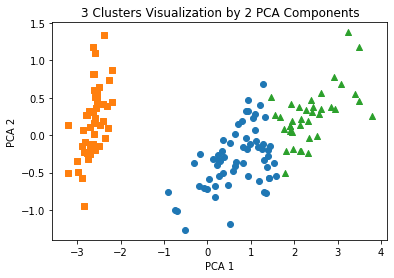

In [12]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


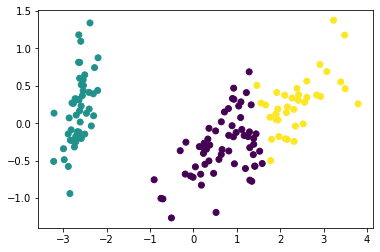

In [13]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster']) 

#### **(3) 군집화 알고리즘 테스트를 위한 데이터 생성**

- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공한다.
- 대표적인 군집화용 데이터 생성기로는 make_blobs()와 make_classification() API가 있으며, 둘 다 분류 용도로도 테스트 데이터 생성이 가능하다.
- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 추가
- make_classification() : 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음

- 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음

**[make_blobs() 사용법]**

- 호출 시 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환된다.

    * n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


    * n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 
    보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현합니다.  


    * centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 
    그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미합니다.  


    * cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 
    만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어집니다.   
    [0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 
    표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 
    세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭니다.   
    군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다. 
    값이 작을수록 각 군집 센트로이드에 데이터들이 모여 있습니다.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape) #군집화 시뮬레이션을 위한 유사 군집화이며 kmeans 군집화 값이 아님

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [32]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


**$ make_blob()으로 만들어진 데이터 포인트들을 시각화**

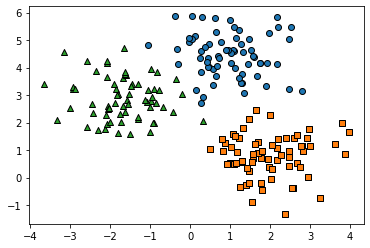

In [23]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

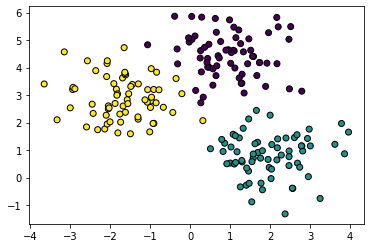

In [24]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )

In [25]:
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


**$ K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

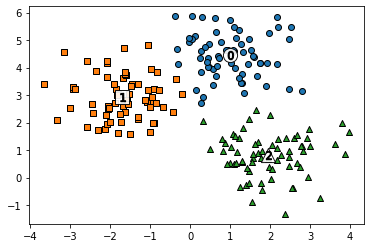

In [27]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_ # 각 군집의 중심위치 좌표
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    center_x_y = centers[label]
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label) # 숫자표현

plt.show()

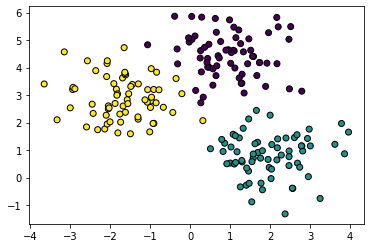

In [28]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )

In [29]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [30]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts()) # kmeans_label : 군집화 결과

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### **02. 군집 평가 (Cluster Evaluation)**

#### **(1) 실루엣 분석의 개요**

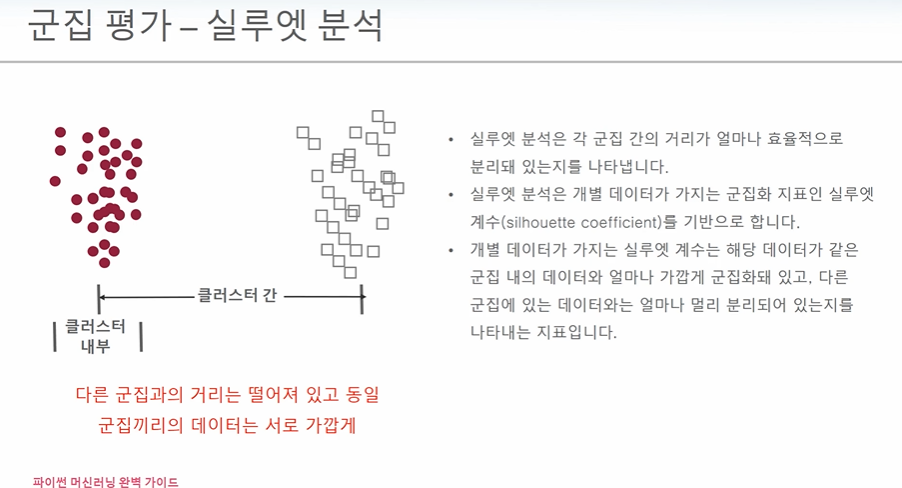

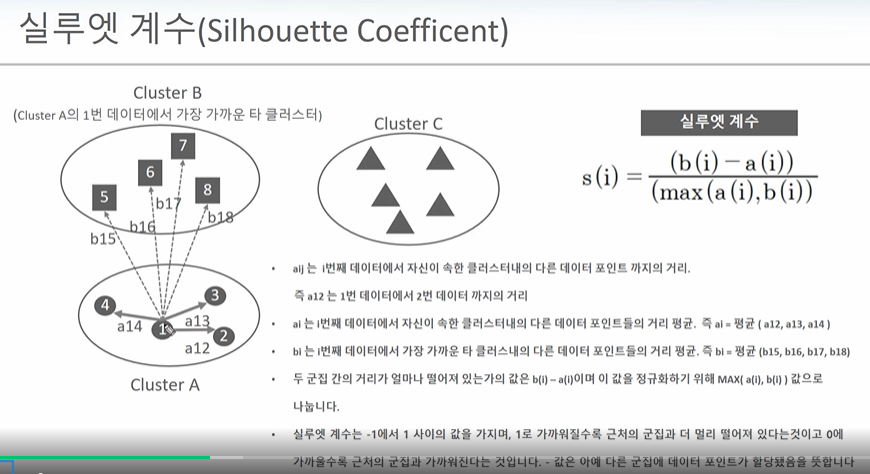

#### **(2) 붓꽃 데이터 세트를 이용한 군집 평가**

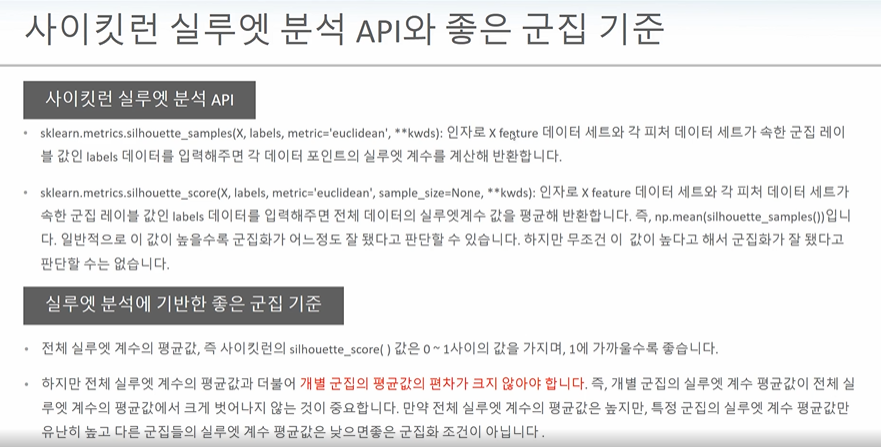

#### **(3) 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

### **03. 평균 이동**